# Titanic Dataset: Exploratory Data Analysis

### Get data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Get csv
df_train = pd.read_csv("../dataset/train.csv")
df_test = pd.read_csv("../dataset/test.csv")

### Preparing data: NULLS and features

Profiling the data, we could observe that Age, Cabin and Embarked present nulls values. Data is also explained in [Kaggle data documentation](https://www.kaggle.com/c/titanic/data)

In [2]:
# Profiling Train
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


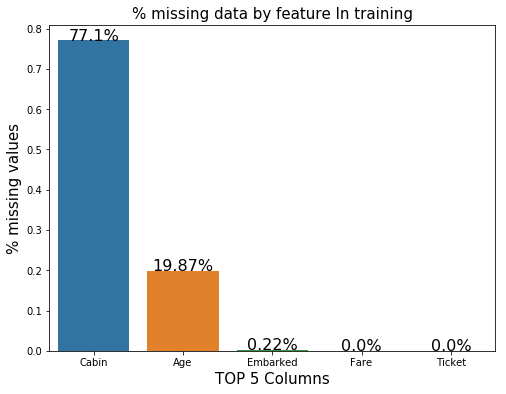

In [4]:
##Visualzation of Null data

def plot_nulls(df):
    N_FEATURE_DISPLAY = 5
    # Concatenate train & test
    #dataset = pd.concat(objs=[df.drop(columns=['Survived']), df_test], axis=0)
    percent_null = (df.isnull().sum().sort_values(ascending=False)/df.shape[0]).iloc[:N_FEATURE_DISPLAY]
    percent_null = pd.DataFrame({'feature':percent_null.index, 'percent':percent_null.values})
    fig, ax = plt.subplots(figsize=(8, 6))
    #plt.xticks(rotation='90')
    g = sns.barplot(x='feature', y='percent',data=percent_null)

    for index, row in percent_null.iterrows():
        g.text(row.name,row.percent,
               '{0}%'.format(round(row.percent*100,2))
               ,color='black'
               ,ha="center"
               ,fontsize=16
              )
    plt.xlabel('TOP 5 Columns', fontsize=15)
    plt.ylabel('% missing values', fontsize=15)
    plt.title('% missing data by feature In training', fontsize=15)
    plt.show()

plot_nulls(df_train)

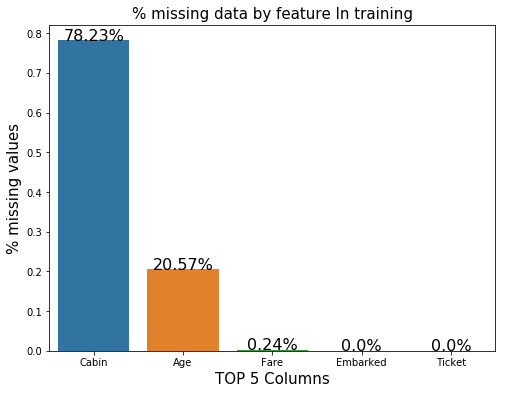

In [5]:
plot_nulls(df_test)

### Data Cleaning

I decided to:

 * Drop **Cabin** feature from analysis becuase it has too much missing values
 * **Age**, **Embarked** and **Fare** Null values are fill with mean values

In [6]:
df_train = df_train.drop(columns=['Cabin'])
df_test  = df_test.drop(columns=['Cabin'])
df_train = df_train.fillna(df_train.mean())
df_test  = df_test.fillna(df_train.mean())

In [7]:
#Final Dataset info
df_train['Sex'] = df_train['Sex'].astype(str)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


### Scrub Data: one-hot-encoding

In [8]:
## Labeling Y data
#df_train.loc[df_train['Survived']==1,'Survived'] = 'Survived'
#df_train.loc[df_train['Survived']==0,'Survived'] = 'Died'

### Final Dataset

The data is reduced to 80%

### Visualizing Distribution

For reading data and performing EDA operations, I’ll primarily use the **numpy** and **pandas** Python packages, which offer simple API's that allow us to plug our data sources and perform our desired operation. For the output, we’ll be using the **Seaborn** package which is a Python-based data visualization library built on **Matplotlib**.

1 - Categorical data distribution

2 - Univariate distribution of numerical columns

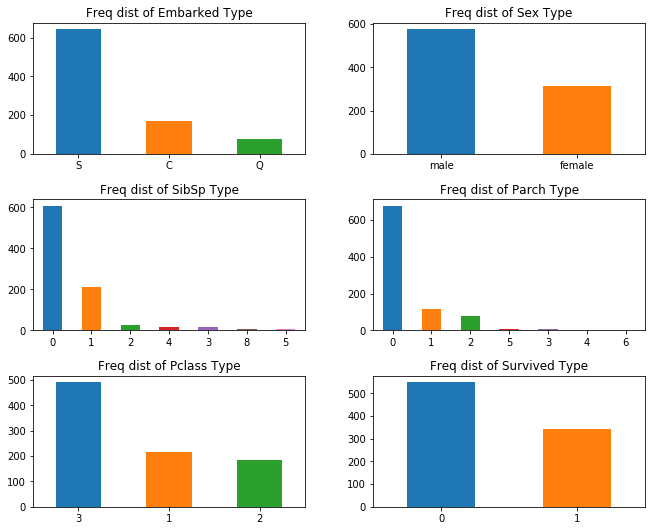

In [9]:
# 2 - Plot bar distribution
import seaborn as sns
from matplotlib import pyplot as plt

col_names = ['Embarked','Sex', 'SibSp', 'Parch', 'Pclass','Survived']

plt.figure(figsize=(10,8))
for i,column in enumerate(col_names):
    plt.subplot(3, 2, i+1)
    g = df_train[column].value_counts().plot.bar(title="Freq dist of {0} Type".format(column))
    for item in g.get_xticklabels():
        item.set_rotation(0)
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.25)

plt.show()


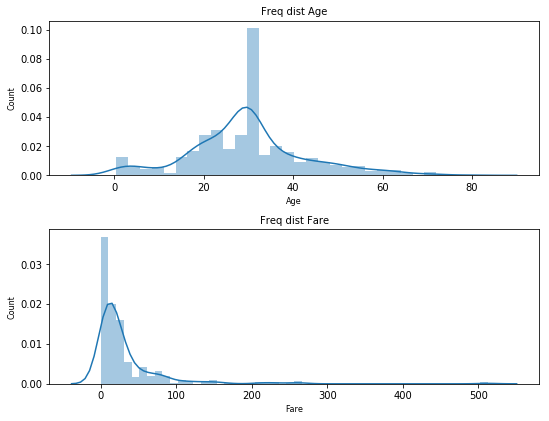

In [10]:
import seaborn as sns

col_names = ['Age','Fare']

fig, ax = plt.subplots(len(col_names), figsize=(8,6))

for i, col_val in enumerate(col_names):

    g = sns.distplot(df_train[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

#matplotlib.rc('xtick', labelsize=1) 
#matplotlib.rc('ytick', labelsize=2)
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,wspace=0.25)
plt.show()

### Check training and testing data is balanced

Training and Testing data present the same proportion of outcomes


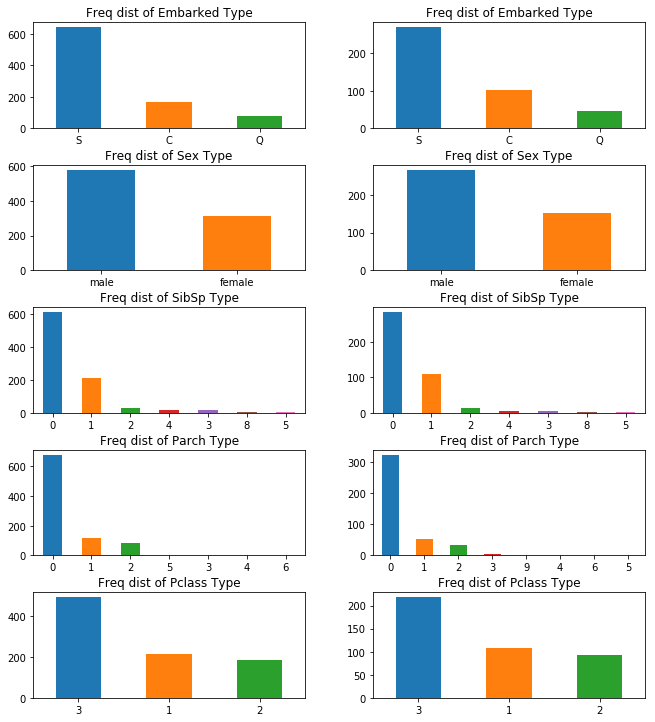

In [11]:
import seaborn as sns
from matplotlib import pyplot as plt

col_names = ['Embarked','Sex', 'SibSp', 'Parch', 'Pclass']

plt.figure(figsize=(10,8))
for i,column in enumerate(col_names):
    plt.subplot(6, 2, 2*i+1)
    g = df_train[column].value_counts().plot.bar(title="Freq dist of {0} Type".format(column))
    for item in g.get_xticklabels():
        item.set_rotation(0)
    plt.subplot(6, 2, 2*i+2)
    g = df_test[column].value_counts().plot.bar(title="Freq dist of {0} Type".format(column))
    for item in g.get_xticklabels():
        item.set_rotation(0)
plt.subplots_adjust(top=1.5, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.25)

plt.show()

### Looking for correlation

With pairplot we could observe interesting relationships like:

  * **'Pclass'** feature seem to be good variables to diferencieta suviving cases when it is relationated with **'Age'**
  * **'Parch'** and **'SibSp'** feature by itself is a good feature by itself
  * **Fare** seems to be a bad feature for clasiffing, beacuese tendencies could not apreciate in pairplot

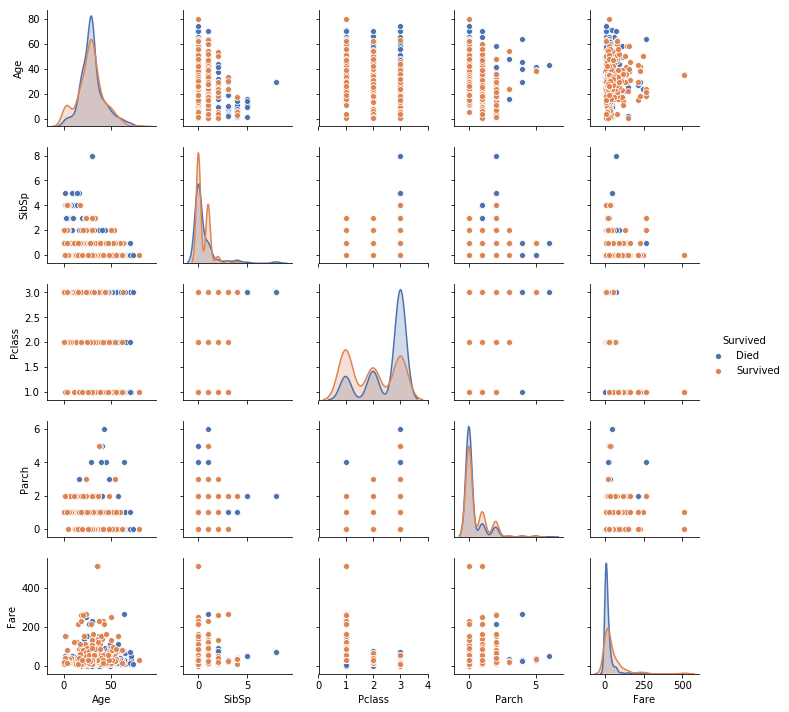

In [12]:
## 3 - Data pair relationship

col_names = ['Age','SibSp','Pclass','Parch','Fare']

def plot_pairplot(df, features):
    df_train2 = df.copy()
    df_train2.loc[df_train['Survived']==1,'Survived'] = 'Survived'
    df_train2.loc[df_train['Survived']==0,'Survived'] = 'Died'
    sns.pairplot(df_train2
                 ,hue='Survived'
                 ,vars=col_names
                 ,palette=sns.color_palette("deep", 10)
                 ,height=2)
    plt.savefig("../fig/1_seaborn_pair_plot.png")
    
plot_pairplot(df_train,col_names)

### How Sex and Embarked features affect to detect surviving cases

Each feauture where contrasted by Age

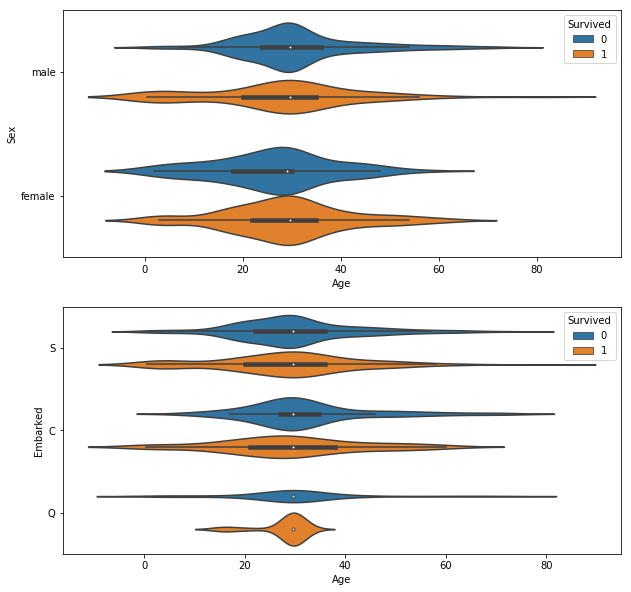

In [13]:
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

g = sns.catplot(x='Age'
            ,y='Sex'
            ,hue='Survived'
            ,data=df_train
            ,kind='violin'
            ,ax=ax1)
h = sns.catplot(x='Age'
            ,y='Embarked'
            ,hue='Survived'
            ,data=df_train
            ,kind='violin'
            ,ax=ax2)
plt.close(g.fig)
plt.close(h.fig)

plt.show()

### Generating dataset for training

 * test size = 25%
 * Convert categorical variable into dummy/indicator variables

In [48]:
# Generate testing Set
def train_test_Titanic(df, test_percent):
    from sklearn.model_selection import train_test_split
    col_names = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
    X = pd.get_dummies(df.loc[:,col_names])
    y = df.loc[:,'Survived']
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=test_percent)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_Titanic(df_train, 0.25)

In [50]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
629,3,29.699118,0,0,7.7333,0,1,0,1,0
36,3,29.699118,0,0,7.2292,0,1,1,0,0
94,3,59.000000,0,0,7.2500,0,1,0,0,1
247,2,24.000000,0,2,14.5000,1,0,0,0,1
443,2,28.000000,0,0,13.0000,1,0,0,0,1


## Model 1 - Tree based method: Decision Tree Deafault

 * Decision Tree with Default config: Score = 0.73205

In particular tree based methods require little data preparation.

Also, Random Forest let identift features that are significantly more discriminative than others.

In [16]:
## Test 1 Decision Tree
from sklearn.tree import DecisionTreeClassifier

default_decision_tree = DecisionTreeClassifier(criterion='gini'
                            ,splitter='best'
                            ,random_state=1
                            ,min_impurity_decrease=0
                            #,max_depth=14
                            )

clf = default_decision_tree
clf.fit(X_train, y_train)

importances = clf.feature_importances_

clf.score(X_test,y_test)

0.78923766816143492

### Feature Importance

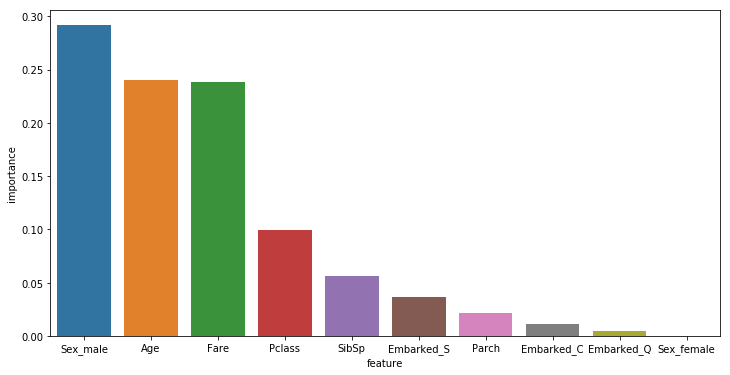

In [17]:
fig = plt.figure(figsize=(12,6))

df_importances = pd.DataFrame({'feature':X.columns.values,'importance':importances})
df_importances = df_importances.sort_values(by=['importance'],ascending=False)

sns.barplot(x='feature'
            ,y='importance'
            ,data=df_importances
           )

plt.show()

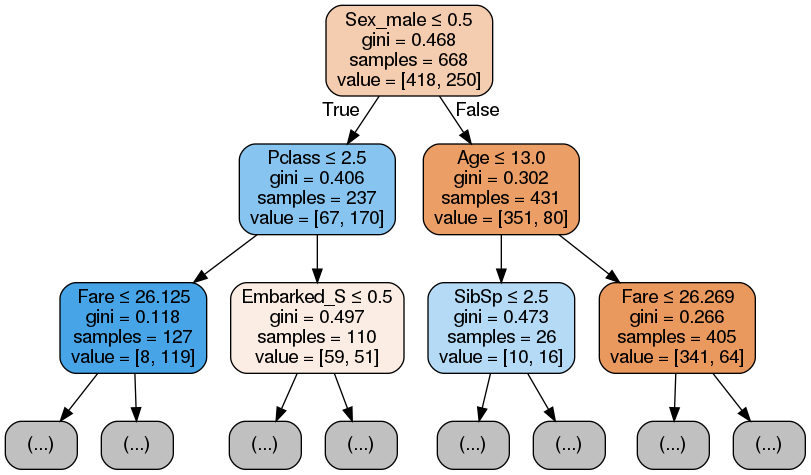

In [18]:
from sklearn.tree import export_graphviz
import pydotplus
import pydotplus
from IPython.display import Image  

dot_data = export_graphviz(clf,
                           out_file=None,  
                           filled=True,
                           rounded=True,
                           special_characters=True,
                          feature_names=X.columns.values,
                          max_depth=2)

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [45]:
#### Exporting Results
def get_test_X(df):
    col_names = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
    X = df.loc[:,col_names]
    X = pd.get_dummies(X)
    X.head()
    return X

X_kaggle = get_test_X(df_test)
X_kaggle.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


In [26]:
#Decicion Tree
y_pred = default_decision_tree.predict(X_kaggle)
df = pd.DataFrame({'PassengerId':df_test['PassengerId'],'Survived':y_pred})
df.head()
df.to_csv('../results/python_decisiontree_default.csv',index=False)

## Model 1 - Tree based method: Decision Tree with Grid Search

In [51]:
X_train, X_test, y_train, y_test = train_test_Titanic(df_train, 0)

In [53]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import  cross_val_score

tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
clf = GridSearchCV(DecisionTreeClassifier()
                   ,tree_para
                   ,cv=5 
                   ,scoring='accuracy')
clf.fit(X_train, y_train)
print('Best Params : {0}'.format(clf.best_params_))
print('Best Score  : {0}'.format(clf.best_score_))

Best Params : {'criterion': 'entropy', 'max_depth': 6}
Best Score  : 0.8215488215488216


#### Exporting Results

In [55]:
y_pred = clf.predict(X_kaggle)
df = pd.DataFrame({'PassengerId':df_test['PassengerId'],'Survived':y_pred})
df.head()
df.to_csv('../results/python_decisiontree_GridSearch.csv',index=False)

#0.77990

In [52]:
X_train.shape

(891, 10)